In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer

In [73]:
df = pd.read_csv('mergeddata.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       304 non-null    object
 1   Symptom_1     304 non-null    object
 2   Symptom_2     304 non-null    object
 3   Symptom_3     304 non-null    object
 4   Symptom_4     272 non-null    object
 5   Symptom_5     234 non-null    object
 6   Symptom_6     186 non-null    object
 7   Symptom_7     158 non-null    object
 8   Symptom_8     140 non-null    object
 9   Symptom_9     120 non-null    object
 10  Symptom_10    110 non-null    object
 11  Symptom_11    68 non-null     object
 12  Symptom_12    47 non-null     object
 13  Symptom_13    30 non-null     object
 14  Symptom_14    19 non-null     object
 15  Symptom_15    18 non-null     object
 16  Symptom_16    10 non-null     object
 17  Symptom_17    1 non-null      object
 18  Description   283 non-null    object
 19  Precauti

C:\Users\DELL\AppData\Local\Temp\ipykernel_6952\4277353742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Disease"], order=df["Disease"].value_counts().index, palette="coolwarm")


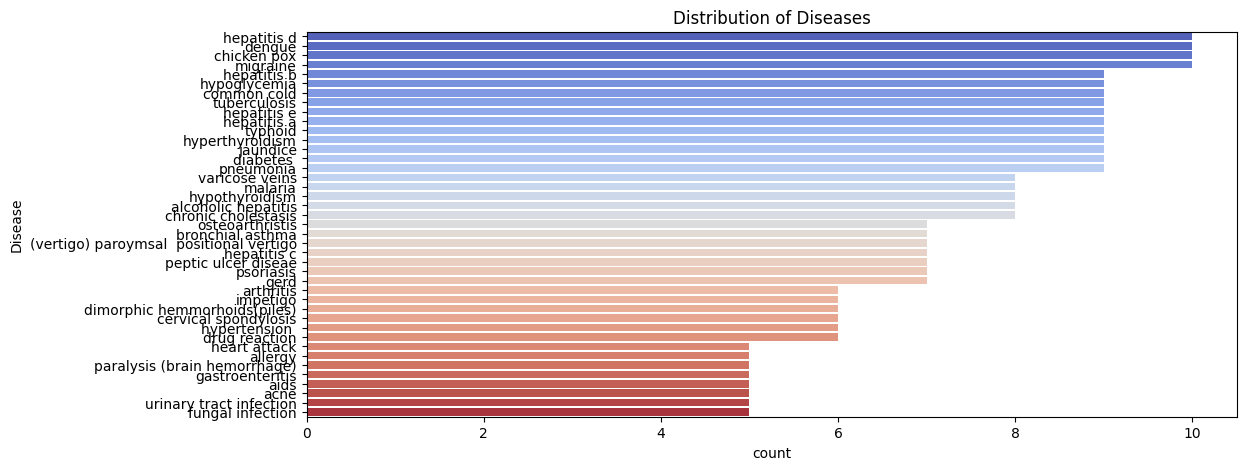

In [75]:
# Disease distribution
plt.figure(figsize=(12, 5))
sns.countplot(y=df["Disease"], order=df["Disease"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Diseases")
plt.show()

In [76]:
#### Random Forest Classification ###

In [77]:
# Handling missing values by using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  
data_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [78]:
# Encoding categorical columns 
label_encoders = {}
for column in ['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17', 'Description', 'Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

In [79]:
# Spliting data into features (X) and target (y)
X = data_imputed.drop('Disease', axis=1)  # Features (Symptom columns, etc.)
y = data_imputed['Disease']  # Target (Disease column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

z = label_encoders['Disease'].inverse_transform(y_pred)
print(X_test)
print(y_pred)
print(z)


     Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
180         15         42         21         19         37          5   
154         33         15         28         49          5         17   
111         33         35         28         19         12         17   
247         11         24         52         40          6         10   
60          11         11          7         16         23         20   
..         ...        ...        ...        ...        ...        ...   
218          7         29          5         22         12         20   
104          6         42         45         18         24          7   
301         24         18         38         47         12         20   
194          6         42         21         46         13          2   
185         28         47          0         12         14         11   

     Symptom_7  Symptom_8  Symptom_9  Symptom_10  ...  Symptom_13  Symptom_14  \
180         13          0         21      

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted') 
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred, average='weighted')  
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred, average='weighted')  
print(f'F1-Score: {f1:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         2
          21       1.00      1.00      1.00         